<div style="border:1px solid black; padding:10px 10px;">
    <strong>CIVIL-321 "Modélisation Numérique des Solides et Structures"</strong><br/><br/>
    <span style="text-decoration:underline;font-weight:bold;">Comment utiliser ce Jupyter Notebook?
    </span><br/><br/>
    Ce <strong>Notebook</strong> est constitué de cellules de texte et de cellule de code. Les cellules de codes doivent être  <strong>executées</strong> pour voir le résultat du programme. Certaines cellules doivent être remplies par vos soins. Pour exécuter une cellule, cliquez dessus simplement et ensuite cliquez sur le bouton "play" (<span style="font: bold 12px/30px Arial, serif;">&#9658;</span>) dans la barre de menu au dessus du notebook. Vous pouvez aussi taper la combinaison de touches <code>shift + enter</code>. Il est important d'éxécuter les cellules de code en respectant leur ordre d'arrivée dans le notebook.
</div>

Pour toute question ou feedback sur ce notebook, merci d'utiliser la plateforme *ED Discussion* du cours
accessible **en cliquant sur ce bouton**:
 
 
 
<div class="container" >
        <a href="https://edstem.org/eu/courses/409/discussion?category=Cours">
            <button class="btn btn-primary btn-lg">Ed Discussion</button>
        </a>
</div>

# Résolution d'un problème à plusieurs barres

## Installation des modules

In [1]:
import numpy as np
from plot import *

## À lire avant de commencer

- Les index sur Python commence à 0 (et non à 1 contrairement à Matlab). C'est pourquoi, nous fixerons nos premiers paramètres (nœuds, éléments, lignes et colonnes des matrices, etc) avec la valeur 0.

- La fonction `plot_matrix(matrix, matrix_name)` permet de visualiser les matrices. Elle prend en entrée:
        - matrix : le nom de la variable       
        - matrix_name = 'nom_matrix'
          - par exemple, matrix_name prendra les valeurs de `C` si on veut la matrice de connectivité.

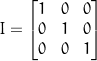

In [2]:
plot_matrix(eye(3), 'I')

## Ce Notebook se décompose en 3 parties:
        1. Matrice de connectivité
        2. Matrice de numérotation d'équation
        3. Matrice de raideur

## 1. Matrice de connectivité

Dans cette section, nous tacherons de

- definir la matrice de connectivité
- comprendre ce qui l'influençe

Nous définissons une structure de référence à l'aide des matrices de positions et de connectivité

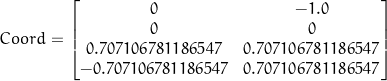

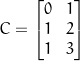

In [3]:
positions = np.array([
    [0, -1],
    [0, 0],
    np.array([1, 1])/np.sqrt(2),
    np.array([-1, 1])/np.sqrt(2)
])
plot_matrix(positions, 'Coord')

conn = [
    [0, 1],
    [1, 2],
    [1, 3]
]
plot_matrix(conn, 'C')

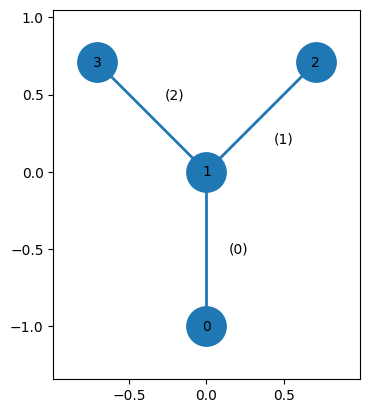

In [4]:
plot_structure(positions, conn)

### 1.1.  Influence de la numérotation des éléments

- Pour changer la numérotation des éléments, il suffit de permuter les lignes de la matrice de connectivité, sans changer la position des nœuds. 
- Par exemple :

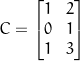

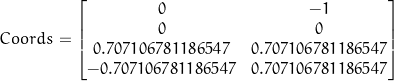

In [5]:
conn = [
    [1, 2],
    [0, 1],
    [1, 3]
]

plot_matrix(conn, 'C')

positions = [
    [0, -1],
    [0, 0],
    np.array([1, 1])/np.sqrt(2),
    np.array([-1, 1])/np.sqrt(2)
]

plot_matrix(positions, 'Coords')

**Question:**

- Quel impact y a-t-il lorsque nous inversons les lignes de la matrice de connectivité sur la structure ? 

- Vérifier votre réponse en affichant la structure avec la fonction `plot_structure`.

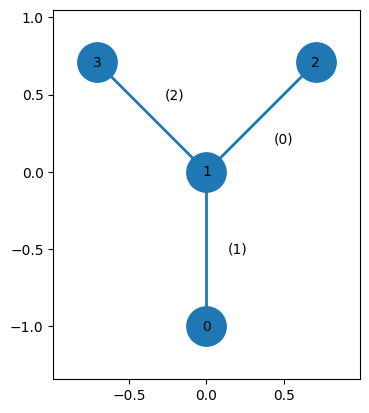

In [6]:
###########
# Solution:
##########


# La structure reste inchangée en revanche, la numérotation des éléments barre est redéfinie.
plot_structure(positions, conn)

### 1.2. Influence de la position des nœuds

- Pour changer la numérotation des noeuds, il suffit de changer leurs positions.
- Par exemple, on peut permuter les noeuds 1 et 3 de la façon suivante :

In [7]:
positions = [
    [0, -1],
    np.array([-1, 1])/np.sqrt(2),
    np.array([1, 1])/np.sqrt(2),
    [0, 0]
]

- Modifier la matrice de connectivité associée à ce changement :

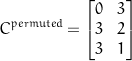

In [8]:
###########
# Solution:
##########


conn = [
    [0, 3],
    [3, 2],
    [3, 1]
]

plot_matrix(conn, 'C^{{permuted}}')

- Vérification: les nœuds 1 et 3 ont bien permuté ?

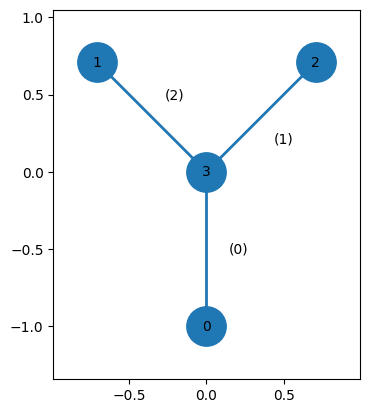

In [9]:
plot_structure(positions, conn)

**Question:**

Quel impact y a-t-il lorsque l'on permutte les nœuds sur la matrice de connectivité ?

---

 **Solution:**

 ---



- La matrice de connectivité est complètement redéfinie. 
- Il n'existe pas de règle entre un changement dans la matrice de connectivité et une permutation des nœuds.

### 1.3. Influence des matrices positions et de connectivité sur la structure

- Dessiner sur papier la structure obtenue pour la matrice C et la position des nœuds suivante:

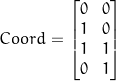

In [10]:
positions = [
    [0, 0],
    [1, 0],
    [1, 1],
    [0, 1]
]
plot_matrix(positions, 'Coord')

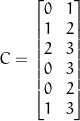

In [11]:
conn = [
    [0, 1],
    [1, 2],
    [2, 3],
    [0, 3],
    [0, 2],
    [1, 3],
]

plot_matrix(conn, 'C')

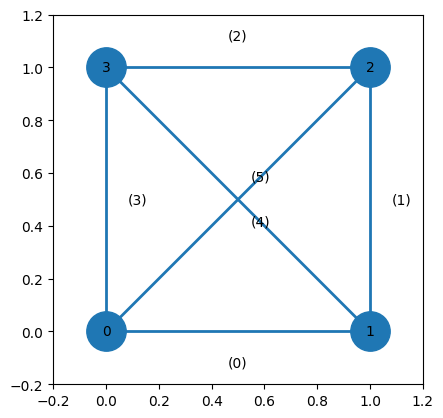

In [12]:
###########
# Solution:
##########


plot_structure(positions, conn)

## 2. La matrice de numérotation d'équation

- Dans cette section, nous allons introduire les degrés de libertés (ddl) de chaque nœud. 
- Chaque degré de liberté est associé à une équation. 

$$[K]
\left\{\begin{matrix}
u_1\\
\vdots\\
u_n
\end{matrix}\right\} = 
\left\{\begin{matrix}
f_1\\
\vdots\\
f_n
\end{matrix}\right\} \qquad
\begin{matrix}
equation~\#1\\
\vdots\\
equation~\#n
\end{matrix}
$$
- Pour chaque ddl $u_i$: a quel noeud correspond-t-il ? direction x ou y ?
- La matrice de numérotation d'équation $\boldsymbol{E_{qn}}$ stocke cette information

*Rq: cette information sera vraiment utile lors de l'assemblage de la matrice de raideur $\boldsymbol{K}$.*

- Reprenons notre structure de référence. 
- On ajoute à l'affichage les indices des ddl $[i, j]$ pour chaque nœud $\Rightarrow$

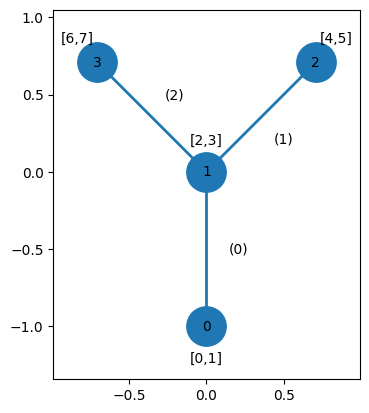

In [13]:
positions = [
    [0, -1],
    [0, 0],
    np.array([1, 1])/np.sqrt(2),
    np.array([-1, 1])/np.sqrt(2)
]

conn = [
    [0, 1],
    [1, 2],
    [1, 3]
]

# La variable plot_eqn = 'packed' sert simplement à ajouter les ddl sur le plot. 
# La variable ret est utilisée pour sortir la matrice Eqn associée. 

ret = plot_structure(positions, conn, plot_eqn='packed')

### 2.1. Définition de la matrice de numérotation par nœud $\boldsymbol{E_{qn}}$

- La matrice $\boldsymbol{E_{qn}}$ associée est telle que :

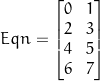

In [14]:
plot_matrix(ret['eqn_node'], 'Eqn')

**Question :**
- Que représente cette matrice ? 
- Définir les lignes et les colonnes de cette matrice.

---

 **Solution:**

 ---



- Elle permet de numeroter les ddls de chaque nœud. 
- Les lignes correspondent aux nœuds de la structure et les colonnes aux directions de l'espace (x ou y) associées.

### 2.2. Définition de la matrice de numérotation par éléments $\boldsymbol{E_{qe}}$

- La matrice $\boldsymbol{E_{qe}}$ associée est :

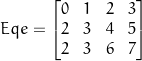

In [15]:
plot_matrix(ret['eqn_elem'], 'Eqe')

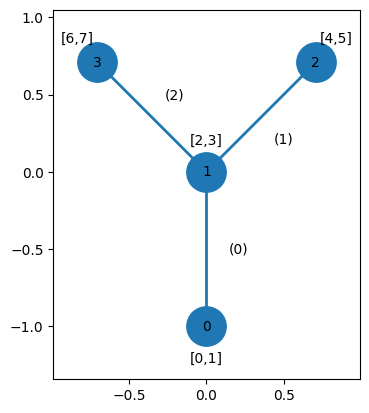

In [16]:
ret = plot_structure(positions, conn, plot_eqn='packed')

**Question:**

- Que représente cette matrice ? 

- Définir les lignes et les colonnes de cette matrice afin de bien comprendre la différence entre $\boldsymbol{E_{qn}}$ et $\boldsymbol{E_{qe}}$.

---

 **Solution:**

 ---



Concernant la matrice de numérotation des équations par élément:

- Elle permet de localiser les ddls de chaque élément, triés par nœuds. 
- Les lignes correspondent aux éléments barres et les colonnes aux ddls de ces éléments. 
- Dans le cas 2D, nous avons deux ddls par nœuds. 
  - Ainsi, les deux premières colonnes correspondent au premier nœud de la barre 
  - alors que les deux dernières au deuxième nœud.

### 2.3. Influence de la définition des ddl associés à chacun des nœuds.

- Définir la matrice " eqn_node " comme variable telle que les lignes (0) et (1) soient inversées. Indication : définir la variable à l'aide de _np.array()_.

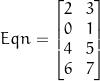

In [17]:
###########
# Solution:
##########


eqn_node = np.array([
    [2, 3],
    [0, 1],
    [4, 5],
    [6, 7]
])

plot_matrix(eqn_node, 'Eqn')

- Visualiser la structure avec la nouvelle matrice $\boldsymbol{E_{qn}}$ définie précédemment.

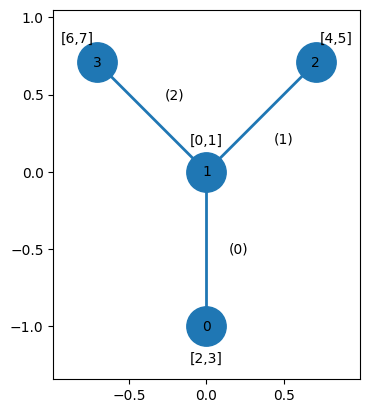

In [18]:
ret = plot_structure(positions, conn, plot_eqn=eqn_node)

**Question:**

Quel impact cela aura-t-il sur la matrice de numéro d'équation par éléments ? Écrire la nouvelle matrice $\boldsymbol{E_{qe}}$.

---

 **Solution:**

 ---



Les ddls des nœuds 0 et 1 sont simplement inversés.

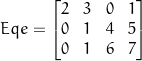

In [19]:
###########
# Solution:
##########


eqn_elem = np.array([
    [2, 3, 0, 1],
    [0, 1, 4, 5],
    [0, 1, 6, 7]
])

plot_matrix(eqn_elem, 'Eqe')

### 2.4. Influence de la position des nœuds

- Nous permutons les nœuds 1 et 2 dans la matrice "positions".

In [20]:
positions = [
    [0, -1],
    np.array([1, 1])/np.sqrt(2),
    [0, 0],
    np.array([-1, 1])/np.sqrt(2)
]

- Écrire la matrice de connectivité associée à ce changement.

In [21]:
###########
# Solution:
##########


conn = [
    [0, 2],
    [2, 1],
    [2, 3]
]

- Vérifier sur la figure ci-dessous que les nœuds 1 et 2 ont bien permuté.

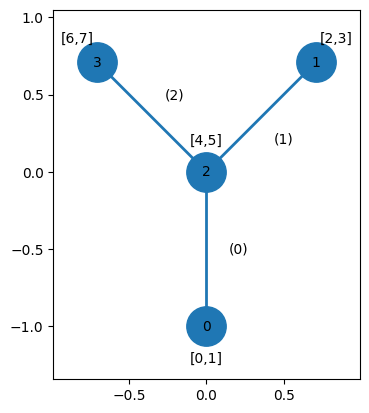

In [22]:
ret = plot_structure(positions, conn, plot_eqn="packed")

**Question:**

Quel impact cela aura-t-il sur la matrice de numérotation d'équation par éléments $\boldsymbol{E_{qe}}$ ? Écrire la nouvelle matrice $\boldsymbol{E_{qe}}$.

---

 **Solution:**

 ---



Les ddls des nœuds 0 et 1 sont simplement inversés.

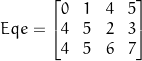

In [23]:
###########
# Solution:
##########


plot_matrix(ret['eqn_elem'], 'Eqe')

### 2.5. Sur la base de l'exemple 1.3. , comment définiriez vous les matrices $\boldsymbol{E_{qn}}$ et $\boldsymbol{E_{qe}}$?

*Rq: Pour rappel, les matrices de connectivité et de positions sont les suivantes*

In [24]:
positions = [
    [0, 0],
    [1, 0],
    [1, 1],
    [0, 1]
]

conn = [
    [0, 1],
    [1, 2],
    [2, 3],
    [0, 3],
    [0, 2],
    [1, 3],
]

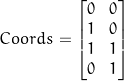

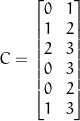

In [25]:
plot_matrix(positions, 'Coords')
plot_matrix(conn, 'C')

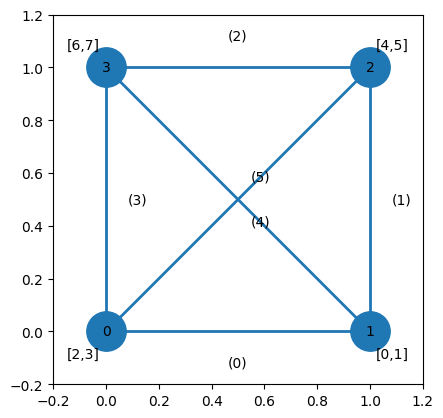

In [26]:
ret = plot_structure(positions, conn, plot_eqn=eqn_node)

**Question:**

Trouver les matrices des numéros d'équations par noeuds et par éléments

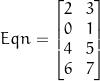

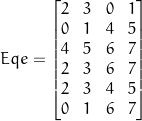

In [27]:
###########
# Solution:
##########


plot_matrix(ret['eqn_node'], 'Eqn')
plot_matrix(ret['eqn_elem'], 'Eqe')

### 2.6. Influence du regroupement les ddl

Reprenons notre structure de référence :

In [28]:
positions = [
    [0, -1],
    [0, 0],
    np.array([1, 1])/np.sqrt(2),
    np.array([-1, 1])/np.sqrt(2)
]

conn = [
    [0, 1],
    [1, 2],
    [1, 3]
]

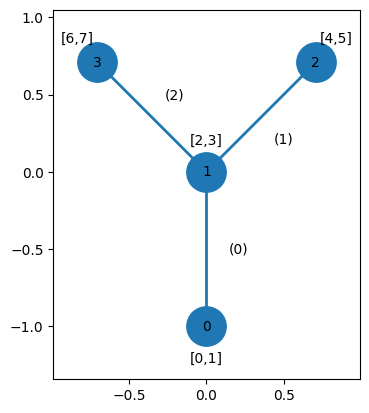

In [29]:
ret = plot_structure(positions, conn, plot_eqn='packed')

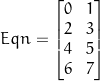

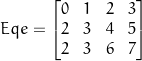

In [30]:
plot_matrix(ret['eqn_node'], 'Eqn')
plot_matrix(ret['eqn_elem'], 'Eqe')

- Changeons la façon de grouper les ddls. 
- Nous choissisons de ne plus les grouper par nœuds, 
  - i.e. $(d_{1x}, d_{2x}, \cdots, d_{1y}, d_{2y}) \Rightarrow (d_{1x}, d_{1y}, \cdots, d_{2x}, d_{2y})$.

**Question:**

- Comment s'écrirait la matrice Eqe?

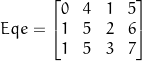

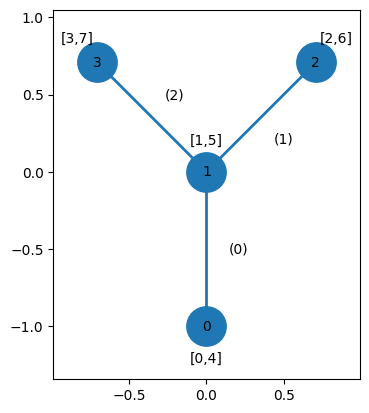

In [31]:
###########
# Solution:
##########

ret = plot_structure(positions, conn, plot_eqn="stride")
eqn_elem = ret['eqn_elem']
plot_matrix(ret['eqn_elem'], 'Eqe')

## 3. Matrice de raideur

### 3.1. Barre inclinée

Dans le cas d'une barre de treillis tournée:

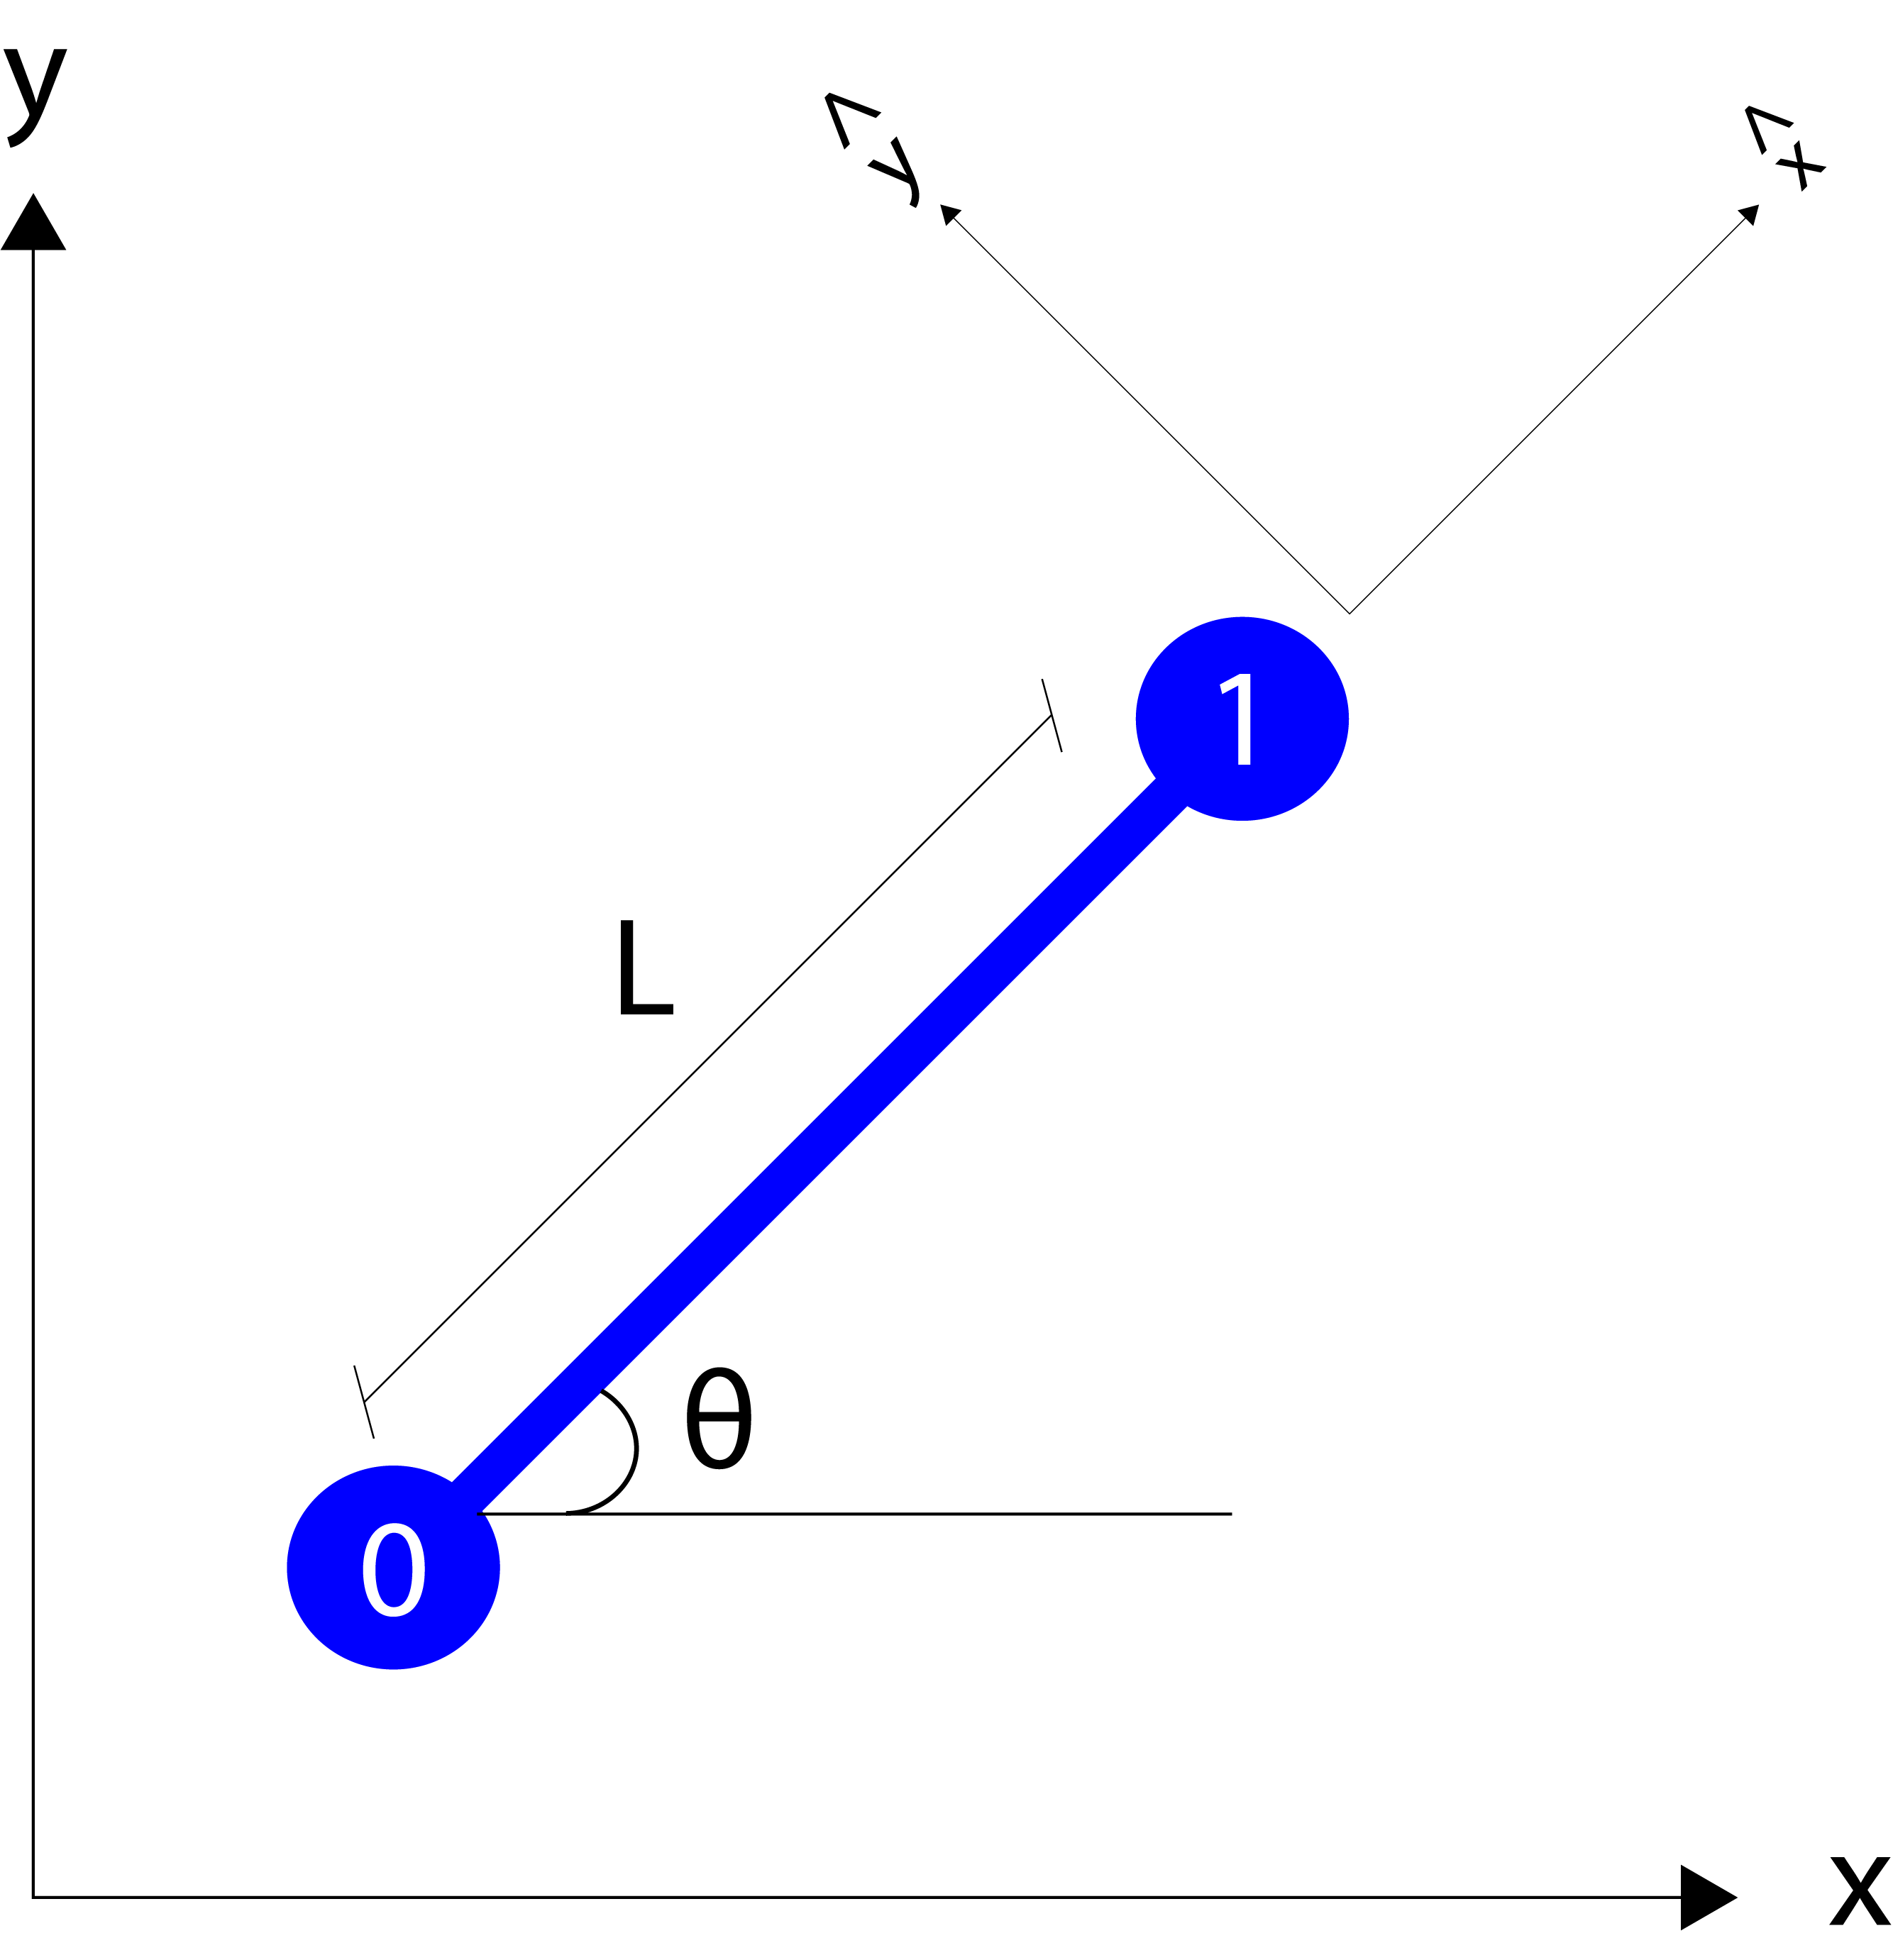

In [32]:
Image(filename = './Figures/barre_rotated.png',  width=300, height=300)

- Afin de traiter cette partie dans le cas le plus général, nous utiliserons une **écriture symbolique**.
- Pour cela, nous utilisons la fonction `Symbol` qui prend en entrée le nom de la variable et le type de variable (réelle, positive, etc). 

```python
L = Symbol('L', real=True, positive=True)
A = Symbol('A', real=True, positive=True)
```

- Les applications numériques pourront être calculées par substitution.

```python
(E*A/L).subs({L: 1, E: 1, A: 1})
```

On définit les symboles correspondant à l'angle $\theta$ et à la longueur $L$ de la barre.

In [33]:
theta = Symbol(r'\theta', real=True)

L = Symbol('L', real=True, positive=True)

- Écrire la matrice de positions associée à l'exemple, sous la forme :
    ```python
    positions = Matrix([
    ...
    ])
    ```
- Exprimer la matrice de connectivité à partir des variables L et theta, sous la forme :
    ```python
conn = np.array([
    ...
    ])
```

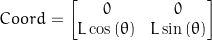

In [34]:
###########
# Solution:
##########


positions = Matrix([
    [0, 0],
    [L*cos(theta), L*sin(theta)]
])

plot_matrix(positions, 'Coord')

conn = np.array([
    [0, 1]
])

plot_matrix(conn, 'C')

#### Matrice de rotation

La fonction `calculerMatriceRotation` permet de calculer 
  - la matrice de rotation $\mathbf{r}$ en fonction de
    - la position du nœud 0 (p0)
    - la position du nœud 1 (p1) 
  - la longueur L de la barre. 


*Rq: La fonction `simplify` permet de simplifier une expression symbolique*

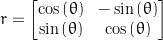

In [35]:
p0 = positions[0, :]
p1 = positions[1, :]

r, _L = calculerMatriceRotation(p0, p1)
r = simplify(r)
plot_matrix(r, 'r')

### Calcul de la matrice de raideur (rigidité) d'une barre de treillis.
 
#### Matrice de rotation de la raideur

- La matrice de rotation $R$ (pour tourner $K$) est définie par $R = \begin{bmatrix} r & 0 \\ 0 & r \end{bmatrix}$.

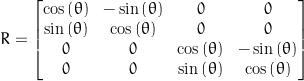

In [36]:
R = zeros(4, 4)
R[0:2, 0:2] = r
R[2:4, 2:4] = r

plot_matrix(R, 'R')

#### Matrice de raideur dans le repère de la barre

- Définir des symboles pour le module d'elasticité $E$ et l'aire de la section $A$:

- On pretera attention à préciser le type de variable considérée (réelle, positive, etc.)

In [37]:
E = Symbol('E', real=True, positive=True)
A = Symbol('A', real=True, positive=True)

- La fonction _calculerMatriceRigiditeLocale_ calcule la matrice de rigidité locale en prenant comme paramètre la rigidité de la barre k. 
- Écrire $k$ en fonction de $E$, $A$ et $L$.

In [38]:
###########
# Solution:
##########

k = E*A/L

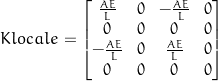

In [39]:
Klocale = calculerMatriceRigiditeLocale(k)
Klocale = Matrix(Klocale)

Klocale = simplify(Klocale)
plot_matrix(Klocale, 'Klocale')

**Question :**

Dans la partie précédente, les ddl ont été groupés par variables $(d_{1x}, d_{2x}, d_{1y}, d_{2y})$ et non plus par nœuds $(d_{1x}, d_{1y}, d_{2x}, d_{2y})$.

- Quel est l'influence de ce changement sur la matrice de raideur K? 

- En quoi un tel changement serait utile?

---

 **Solution:**

 ---



- Les termes non nuls de la matrice de raideur $\boldsymbol{K}$ sont tous regroupés sur un bloc. 
- Cela peut fortement diminuer le temps de calcul d'un code en éléments finis (simplification des produits matriciels, etc.)

### Rotation de la matrice de raideur

- Pour rappel, la matrice de rigidité dans le repère global s'exprime par : 

$$ K = R K^{locale} R^T $$

D'où :

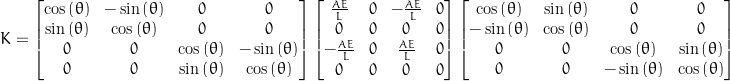

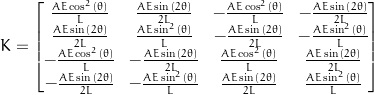

In [40]:
plot_matrix_product(R, Klocale, R.T, 'K')
plot_matrix(simplify(R@Klocale@R.T), 'K')

- La fonction `assemblerMatriceRigidite` assemble la matrice de rigidité en fonction de: 
  - la positions des nœuds
  - la matrice de connectivité
  - le produit $EA$ Dans la cas d'une seule barre
  
La matrice assemblée correspond à la matrice de rigidité $\boldsymbol{K}$ précédente.

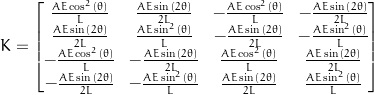

In [41]:
K = assemblerMatriceRigidite(positions, conn, [E*A])
K = simplify(K)
plot_matrix(K, 'K')

**Question :**

Dans les cas particuliers de $\theta = 90^\circ$ et $\theta = 180^\circ$, comparer la matrice de raideur K avec la matrice de raideur locale d'une barre

- *Rq: faites une application numérique, via `subs` , pour répondre à cette question*
- *Rq2: vous pouvez aussi définir le module de Young $E$ et la section $A$*

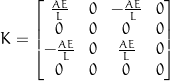

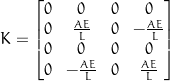

In [42]:
###########
# Solution:
##########


# theta = pi
app_num = {theta:pi}
plot_matrix(K.subs(app_num), 'K')

# theta = pi/2
app_num = {theta:pi/2}
plot_matrix(K.subs(app_num), 'K')

### 3.2. Treillis

Passons au cas des treillis: i.e. des structures composées de plusieurs barres.

- Definissez la positions de 4 nœuds selon votre choix : `positions = np.array([...])`
- Définissez la matrice de connectivité selon votre choix : `conn = np.array([...])`
- Afficher graphiquement la structure avec la fonction `plot_structure`

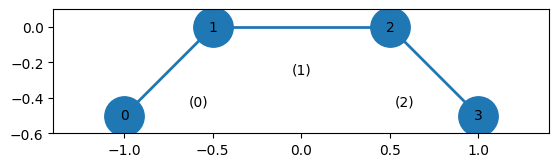

In [43]:
# Par exemple, on peut choisir :

positions = np.array([
    [-1., -.5],
    [-.5, 0],
    [.5, 0],
    [1., -.5]
])

conn = np.array([
    [0, 1],
    [1, 2],
    [2, 3]
])

plot_structure(positions, conn)

La fonction `plot_bloc_stiffness` permet de visualiser les étapes d'assemblage

- Barre après barre (1 barre une couleur ou superposition)
- Seules les composantes non nulles apparaissent.

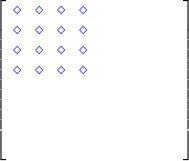

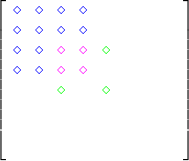

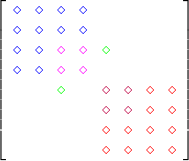

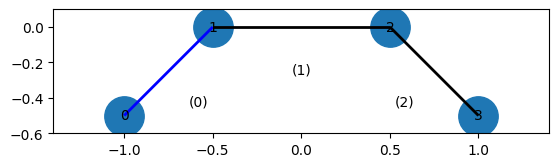

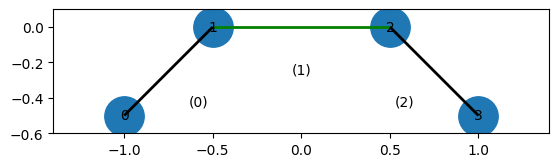

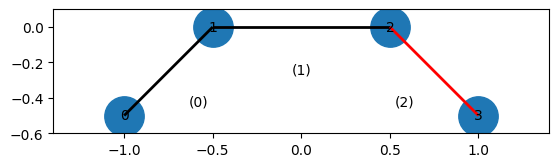

In [44]:
# Le module d'élasticité et l'aire sont définis comme :
E = 210e6
A = 1 

plot_bloc_stiffness(positions, conn, E, A, nb_barre=len(conn))

**Question:**

- Pourquoi le bloc central n'est pas plein (contient des éléments nuls) ?

---

 **Solution:**

 ---



- Pour la barre horizontale des déplacements horizontaux ne créent pas d'efforts verticaux 
- Comparable à la matrice de raideur exprimée dans l'axe de la barre

**Question**

- Ajouter une barre entre deux nœuds qui ne sont pas déjà reliés (faites le en changeant la matrice de connectivité). 
- Tentez de prédire le profile de la matrice de raideur
- Vérifiez avec la fonction `plot_bloc_stiffness`

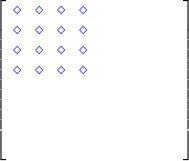

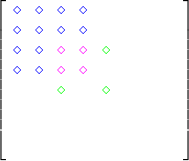

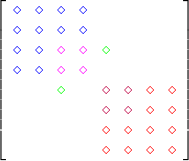

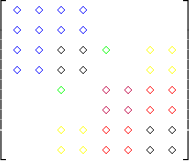

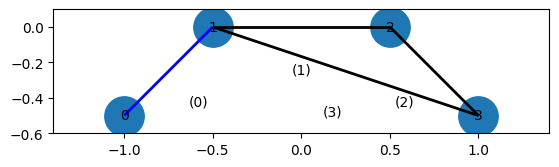

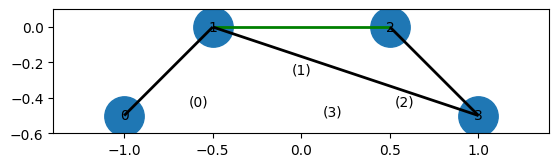

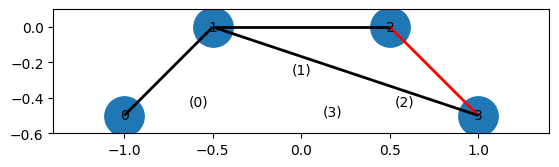

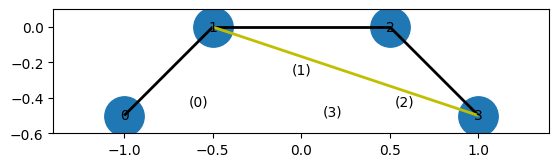

In [45]:
###########
# Solution:
##########


# Dans notre exemple, on peut relier les nœuds 1 et 3 :

conn = np.array([
    [0, 1],
    [1, 2],
    [2, 3],
    [1, 3]
])


plot_bloc_stiffness(positions, conn, E, A, nb_barre=len(conn))